In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('/Users/agorina/Desktop/Flatiron/recipes_nlp/concat_uncleaned_recipes.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,Ingredients,Cuisine
0,25cm/10in sponge (cut from a large bought flan...,6
1,500g/1lb 2oz sausagemeat 450g/1lb self-raising...,6
2,450g/1lb self-raising flour 1 tsp baking powde...,6
3,175g/6oz plain flour 1 tsp baking powder 25g/1...,6
4,125g/4½oz plain flour 300g/10½oz caster sugar ...,6


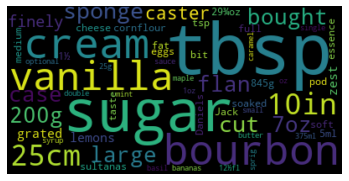

In [6]:
text = df.Ingredients[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

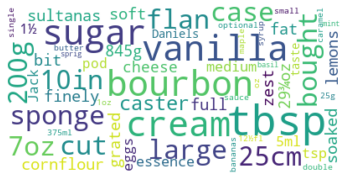

In [7]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
text = " ".join(word for word in df.Ingredients)

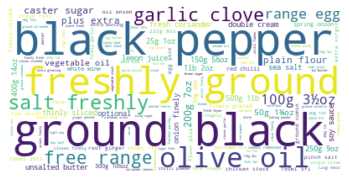

In [9]:
stopwords = set(STOPWORDS)
stopwords.update(['inch', 'ounce', 'pound', 'pounds', 'teaspoon', 'tablespoon', 'cup', 'small', 'medium', 'large', 'oz', 'lb', 'lbs', 'g', 'kg', 'gram', 'grams', 'cm', 'chopped', 'tbsp', 'tsp', 'ml', 'l', 'tsp', 'fl', 'add', 'ingredients', 'to', 'list'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
pot_mask = np.array(Image.open("/Users/agorina/Desktop/pan.png"))
pot_mask

array([[[253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        ...,
        [254, 254, 254, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255]],

       [[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        ...,
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255]],

       ...,

       [[253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        ...,
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255]],

       [[253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        ...,
        [253, 253, 253, 255],
        [253, 253, 253, 255],
        [253, 253, 253, 255]],

       [[254

In [21]:
def transform_format(val):
    if val == 253:
        return 255
    else:
        return val

In [25]:
df['Cuisine'].value_counts()

7     454
3     436
5     367
9     299
6     254
8     157
2     137
4      86
13     83
11     45
1      32
10     32
12     30
Name: Cuisine, dtype: int64

In [29]:
df['Cuisine'].dtypes

dtype('int64')

In [35]:
usa_df = df[df.Cuisine == 6]
fra_df = df[df.Cuisine == 5]
ita_df = df[df.Cuisine == 3]
mex_df = df[df.Cuisine == 2]
brit_df = df[df.Cuisine == 7]
chi_df = df[df.Cuisine == 8]
ind_df = df[df.Cuisine == 9]
jap_df = df[df.Cuisine == 13]


In [38]:
usa = " ".join(recipe for recipe in usa_df.Ingredients)
fra = " ".join(recipe for recipe in fra_df.Ingredients)
ita = " ".join(recipe for recipe in ita_df.Ingredients)
mex = " ".join(recipe for recipe in mex_df.Ingredients)
brit = " ".join(recipe for recipe in brit_df.Ingredients)
chi = " ".join(recipe for recipe in chi_df.Ingredients)
ind = " ".join(recipe for recipe in ind_df.Ingredients)
jap = " ".join(recipe for recipe in jap_df.Ingredients)

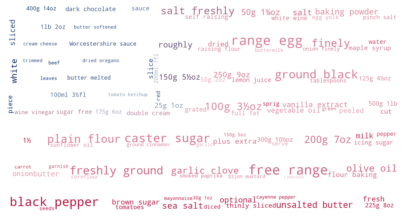

In [51]:
mask = np.array(Image.open("/Users/agorina/Desktop/usflag.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

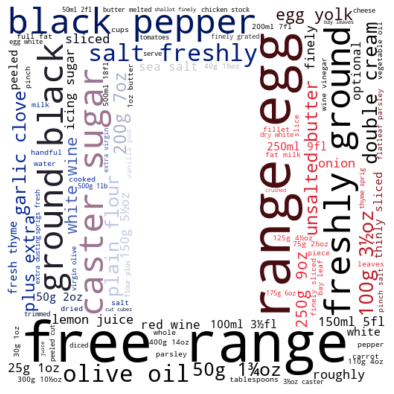

In [52]:
#/Users/agorina/Desktop/Flag_of_France.png
f_mask = np.array(Image.open("/Users/agorina/Desktop/FR-France-Flag-icon.png"))
wordcloud_fr = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=f_mask).generate(fra)

# create coloring from image
image_colors = ImageColorGenerator(f_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fr.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("/Users/agorina/Desktop/usflag.png", format="png")

plt.show()

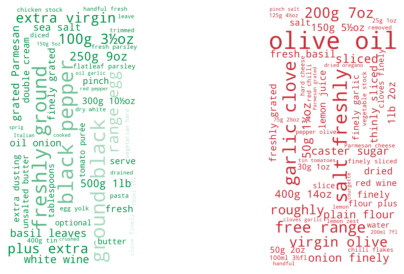

In [50]:
#
i_mask = np.array(Image.open("/Users/agorina/Desktop/italy-flag.png"))
wordcloud_it = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=i_mask).generate(ita)

# create coloring from image
image_colors = ImageColorGenerator(i_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_it.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

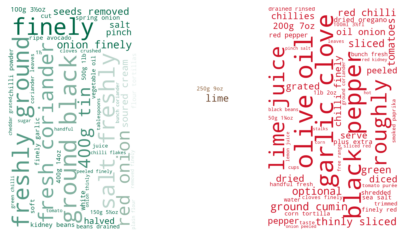

In [53]:
#Flag_of_Mexico
m_mask = np.array(Image.open("/Users/agorina/Desktop/Flag_of_Mexico.png"))
wordcloud_m = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=m_mask).generate(mex)

# create coloring from image
image_colors = ImageColorGenerator(m_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_m.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

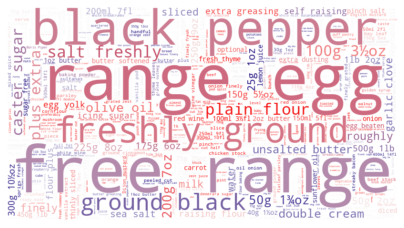

In [57]:
#BRITISH
b_mask = np.array(Image.open("/Users/agorina/Desktop/212-2128040_uk-flag-png-uk-flag.png"))
wordcloud_b = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=500, mask=b_mask).generate(brit)

# create coloring from image
image_colors = ImageColorGenerator(b_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_b.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

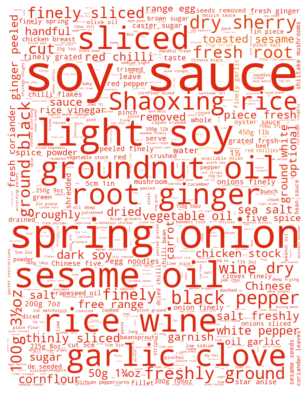

In [59]:
#Chinese
c_mask = np.array(Image.open("/Users/agorina/Desktop/china_flag_full_page.png"))
wordcloud_c = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=500, mask=c_mask).generate(chi)

# create coloring from image
image_colors = ImageColorGenerator(c_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_c.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

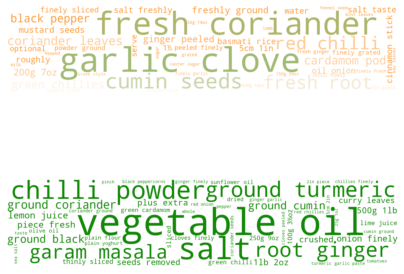

In [60]:
#Flag_of_India
in_mask = np.array(Image.open("/Users/agorina/Desktop/Flag_of_India.png"))
wordcloud_in = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=in_mask).generate(ind)

# create coloring from image
image_colors = ImageColorGenerator(in_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_in.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

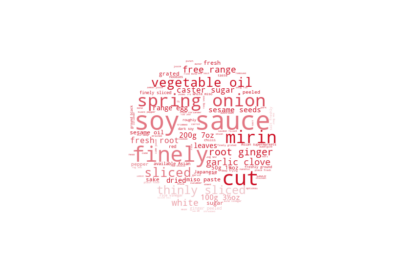

In [61]:

jap_mask = np.array(Image.open("/Users/agorina/Desktop/Flag_of_Japan_bordered.png"))
wordcloud_jap = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=jap_mask).generate(jap)

# create coloring from image
image_colors = ImageColorGenerator(jap_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_jap.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

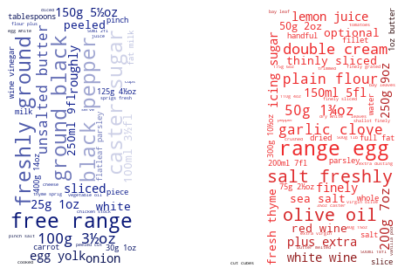

In [63]:
f_mask = np.array(Image.open("/Users/agorina/Desktop/Flag_of_France_(bordered).png"))
wordcloud_fr = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=f_mask).generate(fra)

# create coloring from image
image_colors = ImageColorGenerator(f_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fr.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("/Users/agorina/Desktop/usflag.png", format="png")

plt.show()

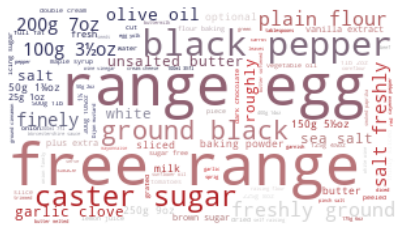

In [68]:
us_mask = np.array(Image.open("/Users/agorina/Desktop/us_flag.png"))
wordcloud_us = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=500, mask=us_mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(us_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_us.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()